# Solution

In [ ]:
# put all python import statements here
from solvers import solver

## Implementation

[First, write code to be able to solve the differential equations using the three methods you have chosen for arbitrary initial conditions ($y(t=0), v(t=0)$), time step and stopping time ($\mathrm{d}t$, $T$) and model parameters ($m, k, g$). Then, write code to solve the nonlinear problem for arbitrary $H$ and $T$, your three choices of differential equation solver and all the other differential equation solver parameters ($y(t=0), \mathrm{d}t, m, k, g$). [100 words]]

In [7]:
# Example for solving differential equations

# Define the right-hand side (RHS) of the differential equation
def rhs(t, y):
    return -y  # Example: y'(t) = -y

# Set initial condition, time step, and stopping time
y0 = 1.0  # Initial value of y
t0 = 0.0  # Start time
dt = 0.1  # Time step
T = 1.0   # End time

# Solve using the Heun method
t, y = solver(rhs, y0, t0, dt, T, method="Heun")

# Print the results
print("Time points:", t)
print("Solution values:", y)


Time points: [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
Solution values: [1.0, np.float64(0.905), np.float64(0.819025), np.float64(0.741217625), np.float64(0.670801950625), np.float64(0.607075765315625), np.float64(0.5494035676106407), np.float64(0.4972102286876298), np.float64(0.449975256962305), np.float64(0.40722760755088605), np.float64(0.36854098483355185)]


In [8]:
import numpy as np

# Compute the exact solution
exact_y = [np.exp(-ti) for ti in t]

# Compare numerical and exact solutions
for i in range(len(t)):
    print(f"t = {t[i]:.1f}, Numerical = {y[i]:.5f}, Exact = {exact_y[i]:.5f}, Error = {abs(y[i] - exact_y[i]):.5e}")


t = 0.0, Numerical = 1.00000, Exact = 1.00000, Error = 0.00000e+00
t = 0.1, Numerical = 0.90500, Exact = 0.90484, Error = 1.62582e-04
t = 0.2, Numerical = 0.81903, Exact = 0.81873, Error = 2.94247e-04
t = 0.3, Numerical = 0.74122, Exact = 0.74082, Error = 3.99404e-04
t = 0.4, Numerical = 0.67080, Exact = 0.67032, Error = 4.81905e-04
t = 0.5, Numerical = 0.60708, Exact = 0.60653, Error = 5.45106e-04
t = 0.6, Numerical = 0.54940, Exact = 0.54881, Error = 5.91932e-04
t = 0.7, Numerical = 0.49721, Exact = 0.49659, Error = 6.24925e-04
t = 0.8, Numerical = 0.44998, Exact = 0.44933, Error = 6.46293e-04
t = 0.9, Numerical = 0.40723, Exact = 0.40657, Error = 6.57948e-04
t = 1.0, Numerical = 0.36854, Exact = 0.36788, Error = 6.61544e-04


In [12]:
def firework_rhs(t, y):
    m = 1.0  # Mass of the firework
    k = 0.1  # Air resistance coefficient
    g = 10.0  # Gravitational acceleration
    dydt = y[1]  # y[1] = velocity
    dvdt = -(k * y[1]**2) / m - g  # Velocity derivative
    return np.array([dydt, dvdt])  # Return as a system [dy/dt, dv/dt]

# Initial conditions
y0 = np.array([0.0, 15.0])  # [height, velocity]
t0 = 0.0  # Start time
T = 1.0   # End time
dt = 0.1  # Time step

# Solve the firework dynamics using Heun's method
t, y = solver(firework_rhs, y0, t0, dt, T, method="Heun")

# Extract height and velocity from the solution
heights = [state[0] for state in y]  # y[0] is height
velocities = [state[1] for state in y]  # y[1] is velocity

# Print the results
print("Time points:", t)
print("Heights:", heights)
print("Velocities:", velocities)

# Exact height at T = 1
exact_height = 5 * (np.log(13 / 4) + 2 * np.log(np.cos(1 - np.arccos(2 / np.sqrt(13)))))
numerical_height = heights[-1]  # Final height from the solution

print("Exact height at T=1.0:", exact_height)
print("Numerical height at T=1.0:", numerical_height)
print("Error:", abs(numerical_height - exact_height))

dt_values = [1/10, 1/20, 1/40, 1/80, 1/160]
exact_height = 5 * (np.log(13 / 4) + 2 * np.log(np.cos(1 - np.arccos(2 / np.sqrt(13)))))

for dt in dt_values:
    t, y = solver(firework_rhs, y0, t0, dt, T, method="Heun")
    heights = [state[0] for state in y]
    numerical_height = heights[-1]
    error = abs(numerical_height - exact_height)
    print(f"dt = {dt:.5f}, Numerical Height = {numerical_height:.5f}, Error = {error:.5e}")




Time points: [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
Heights: [np.float64(0.0), np.float64(1.3375000000000001), np.float64(2.431735445263672), np.float64(3.329206264394505), np.float64(4.061592435487446), np.float64(4.651043556579579), np.float64(5.113263246211544), np.float64(5.459375200887716), np.float64(5.697079471340125), np.float64(5.831370988490933), np.float64(5.864969301130573)]
Velocities: [np.float64(15.0), np.float64(12.184687499999999), np.float64(9.971902376322904), np.float64(8.156504542705266), np.float64(6.61318209824401), np.float64(5.260564595644386), np.float64(4.0428424209655045), np.float64(2.919664920772025), np.float64(1.8602172118850546), np.float64(0.8395069862966069), np.float64(-0.16415722309051217)]
Exact height at T=1.0: 5.891794628863073
Numerical height at T=1.0: 5.864969301130573
Error: 0.02682532773249946
dt = 0.10000, Numerical Height = 5.86497, Error = 2.68253e-02
dt = 0.050

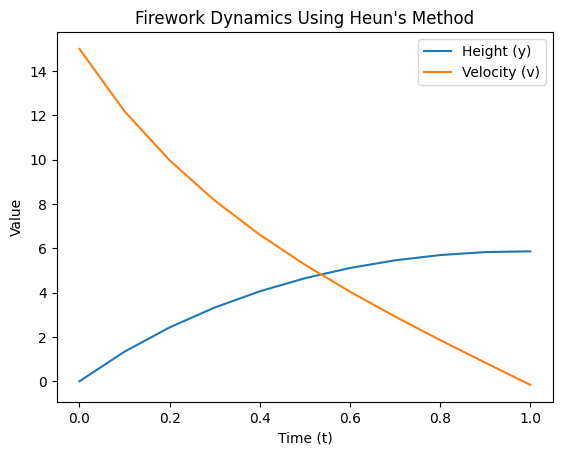

In [10]:
import matplotlib.pyplot as plt

# Plot height and velocity
plt.plot(t, heights, label="Height (y)")
plt.plot(t, velocities, label="Velocity (v)")
plt.xlabel("Time (t)")
plt.ylabel("Value")
plt.title("Firework Dynamics Using Heun's Method")
plt.legend()
plt.show()


In [15]:
# Define the firework dynamics equations
def firework_rhs(t, y):
    m = 1.0  # Mass of the firework
    k = 0.1  # Air resistance coefficient
    g = 10.0  # Gravitational acceleration
    dydt = y[1]  # y[1] = velocity
    dvdt = -(k * y[1]**2) / m - g  # Velocity derivative
    return np.array([dydt, dvdt])  # Return as a system [dy/dt, dv/dt]

In [16]:
# Initial conditions
y0 = np.array([0.0, 15.0])  # [height, velocity]
t0 = 0.0  # Start time
T = 1.0   # End time
dt = 0.1  # Time step

# Solve the firework dynamics using Runge-Kutta method
t, y = solver(firework_rhs, y0, t0, dt, T, method="Runge-Kutta")

# Extract height and velocity from the solution
heights = [state[0] for state in y]  # y[0] is height
velocities = [state[1] for state in y]  # y[1] is velocity

# Print the results
print("Time points:", t)
print("Heights:", heights)
print("Velocities:", velocities)

Time points: [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
Heights: [np.float64(0.0), np.float64(1.3518330782053631), np.float64(2.4534179542889905), np.float64(3.3547234015632155), np.float64(4.089057510850899), np.float64(4.679390028221935), np.float64(5.141859452614004), np.float64(5.487827495935773), np.float64(5.725124999233606), np.float64(5.858815017687041), np.float64(5.891644885596861)]
Velocities: [np.float64(15.0), np.float64(12.165668978893212), np.float64(9.94801243188716), np.float64(8.132887040973195), np.float64(6.59164887851619), np.float64(5.2416326464853835), np.float64(4.0265226191739725), np.float64(2.905781989931846), np.float64(1.8485412082134405), np.float64(0.8298045249340267), np.float64(-0.17210843536692533)]


In [17]:
# Exact height at T = 1
exact_height = 5 * (np.log(13 / 4) + 2 * np.log(np.cos(1 - np.arccos(2 / np.sqrt(13)))))
numerical_height = heights[-1]  # Final height from the solution

print("Exact height at T=1.0:", exact_height)
print("Numerical height at T=1.0:", numerical_height)
print("Error:", abs(numerical_height - exact_height))

Exact height at T=1.0: 5.891794628863073
Numerical height at T=1.0: 5.891644885596861
Error: 0.0001497432662116438


In [18]:
# Test different step sizes with Runge-Kutta method
dt_values = [1/10, 1/20, 1/40, 1/80, 1/160]
errors = []

for dt in dt_values:
    t, y = solver(firework_rhs, y0, t0, dt, T, method="Runge-Kutta")
    heights = [state[0] for state in y]
    numerical_height = heights[-1]
    error = abs(numerical_height - exact_height)
    errors.append(error)
    print(f"dt = {dt:.5f}, Numerical Height = {numerical_height:.5f}, Error = {error:.5e}")

dt = 0.10000, Numerical Height = 5.89164, Error = 1.49743e-04
dt = 0.05000, Numerical Height = 5.89179, Error = 8.20497e-06
dt = 0.02500, Numerical Height = 5.89179, Error = 4.78040e-07
dt = 0.01250, Numerical Height = 5.89179, Error = 2.88172e-08
dt = 0.00625, Numerical Height = 5.89179, Error = 1.76840e-09


Length of t (time points): 161
Length of heights: 161
Length of velocities: 11


ValueError: x and y must have same first dimension, but have shapes (161,) and (11,)

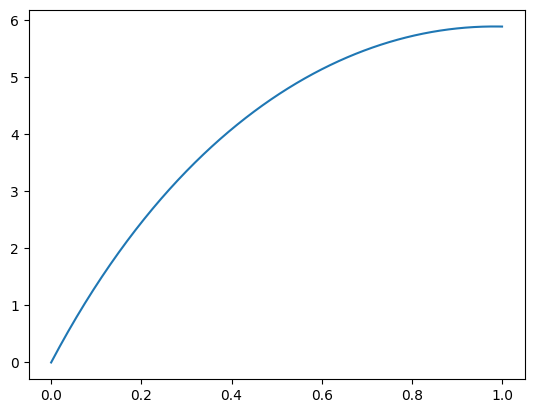

In [ ]:
import matplotlib.pyplot as plt

print("Length of t (time points):", len(t))
print("Length of heights:", len(heights))
print("Length of velocities:", len(velocities))

# Plot height and velocity over time
plt.plot(t, heights, label="Height (y)")
plt.plot(t, velocities, label="Velocity (v)")
plt.xlabel("Time (t)")
plt.ylabel("Value")
plt.title("Firework Dynamics Using Runge-Kutta Method")
plt.legend()
plt.grid()
plt.show()


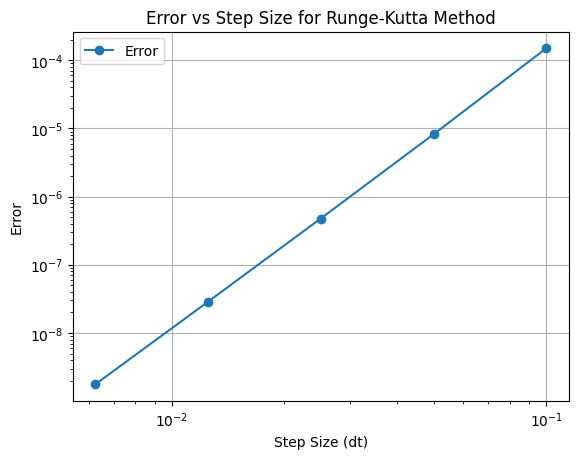

In [28]:
# Plot error vs step size
plt.plot(dt_values, errors, 'o-', label="Error")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Step Size (dt)")
plt.ylabel("Error")
plt.title("Error vs Step Size for Runge-Kutta Method")
plt.legend()
plt.grid()
plt.show()

In [29]:
def firework_rhs(t, y):
    m = 1.0  # Mass of the firework
    k = 0.1  # Air resistance coefficient
    g = 10.0  # Gravitational acceleration
    dydt = y[1]  # y[1] = velocity
    dvdt = -(k * y[1]**2) / m - g  # Velocity derivative
    return np.array([dydt, dvdt])  # Return as a system [dy/dt, dv/dt]


In [30]:
# Initial conditions
y0 = np.array([0.0, 15.0])  # [height, velocity]
t0 = 0.0  # Start time
T = 1.0   # End time
dt = 0.1  # Time step

# Solve the firework dynamics using Ralston's method
t, y = solver(firework_rhs, y0, t0, dt, T, method="Ralston")

# Extract height and velocity from the solution
heights = [state[0] for state in y]  # y[0] is height
velocities = [state[1] for state in y]  # y[1] is velocity

# Print the results
print("Time points:", t)
print("Heights:", heights)
print("Velocities:", velocities)


Time points: [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
Heights: [np.float64(0.0), np.float64(1.3375000000000001), np.float64(2.4332812057074658), np.float64(3.3329565497815024), np.float64(4.06783513079995), np.float64(4.65990948492517), np.float64(5.124822127408051), np.float64(5.473682148107738), np.float64(5.714199815052685), np.float64(5.851395717114461), np.float64(5.888027121505922)]
Velocities: [np.float64(15.0), np.float64(12.202291666666667), np.float64(9.99639278422266), np.float64(8.183646130097799), np.float64(6.641276295412226), np.float64(5.288993696433371), np.float64(4.07148516420872), np.float64(2.9486493339216553), np.float64(1.8898160440189198), np.float64(0.8700994088207554), np.float64(-0.13208844994658087)]


In [31]:
# Exact height at T = 1
exact_height = 5 * (np.log(13 / 4) + 2 * np.log(np.cos(1 - np.arccos(2 / np.sqrt(13)))))
numerical_height = heights[-1]  # Final height from the solution

print("Exact height at T=1.0:", exact_height)
print("Numerical height at T=1.0:", numerical_height)
print("Error:", abs(numerical_height - exact_height))

Exact height at T=1.0: 5.891794628863073
Numerical height at T=1.0: 5.888027121505922
Error: 0.003767507357150812


In [32]:
# Test different step sizes with Ralston's method
dt_values = [1/10, 1/20, 1/40, 1/80, 1/160]
errors = []

for dt in dt_values:
    t, y = solver(firework_rhs, y0, t0, dt, T, method="Ralston")
    heights = [state[0] for state in y]
    numerical_height = heights[-1]
    error = abs(numerical_height - exact_height)
    errors.append(error)
    print(f"dt = {dt:.5f}, Numerical Height = {numerical_height:.5f}, Error = {error:.5e}")

dt = 0.10000, Numerical Height = 5.88803, Error = 3.76751e-03
dt = 0.05000, Numerical Height = 5.89124, Error = 5.56238e-04
dt = 0.02500, Numerical Height = 5.89169, Error = 1.03318e-04
dt = 0.01250, Numerical Height = 5.89177, Error = 2.20177e-05
dt = 0.00625, Numerical Height = 5.89179, Error = 5.06517e-06


ValueError: x and y must have same first dimension, but have shapes (161,) and (11,)

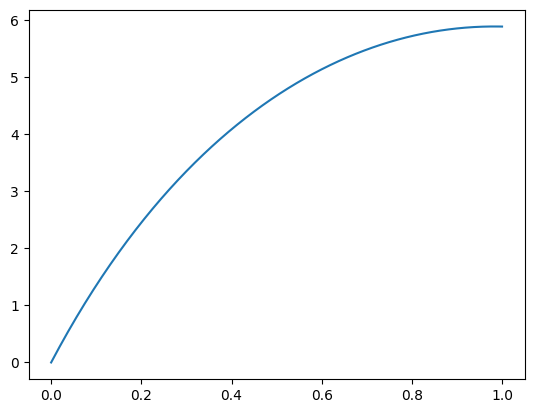

In [33]:
import matplotlib.pyplot as plt

# Plot height and velocity over time
plt.plot(t, heights, label="Height (y)")
plt.plot(t, velocities, label="Velocity (v)")
plt.xlabel("Time (t)")
plt.ylabel("Value")
plt.title("Firework Dynamics Using Ralston's Method")
plt.legend()
plt.grid()
plt.show()

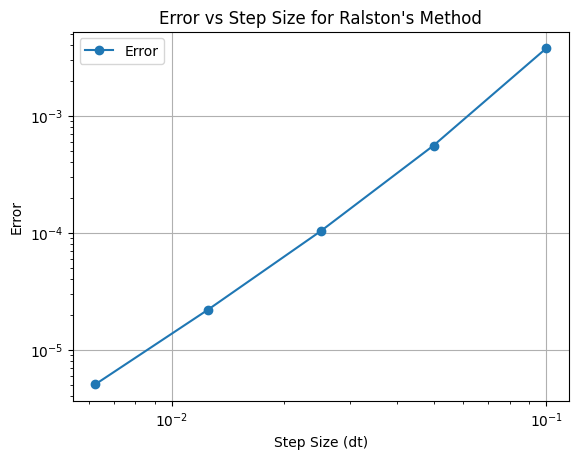

In [34]:
# Plot error vs step size
plt.plot(dt_values, errors, 'o-', label="Error")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Step Size (dt)")
plt.ylabel("Error")
plt.title("Error vs Step Size for Ralston's Method")
plt.legend()
plt.grid()
plt.show()

## Results

[Simulate and show results for each of the test cases suggested by your boss for a range of time steps. For both test cases, you should use (at least) $\mathrm{d}t = T/100, T/200, T/400, T/800, T/1600$. You should demonstrate how solutions look for each method, and the accuracy and efficiency of each approach. [100 words]]

## Analysis

[*Comment on the efficiency and accuracy of each approach. [300 words]*]

## Conclusion

[*Compare the methods that you have results for, and any other relevant methods from the module, and make a recommendation of which method you think is best. [300 words]*]